# UFCFVQ-15-M Programming for Data Science (Spring 2022)
# Programming Task 2

## Student Id: 21076682

### Requirement FR9 - Read CSV data from two files and merge it into a single Data Frame

In [2]:
import pandas as pd

# Read csv files
df1 = pd.read_csv('task2a.csv')
df2 = pd.read_csv('task2b.csv')

merge_data = pd.merge(df1,df2)
merge_data.head(10)

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,season_code
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,1,3
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1,3
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1,3
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1,3
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1,3
5,04/01/2015 05:00,46,2.0,2.0,93.0,4.0,1,3
6,04/01/2015 06:00,51,1.0,-1.0,100.0,7.0,1,3
7,04/01/2015 07:00,75,1.0,-1.0,100.0,7.0,1,3
8,04/01/2015 08:00,131,1.5,-1.0,96.5,8.0,1,3
9,04/01/2015 09:00,301,2.0,-0.5,100.0,9.0,1,3


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR10 - Clean the merged data

In [3]:
cd1 = merge_data[merge_data['new_bike_shares'] > 20]
clean_df = cd1.drop(['season_code'], axis=1)

clean_df

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,1
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1
...,...,...,...,...,...,...,...
17409,03/01/2017 19:00,1042,5.0,1.0,81.0,19.0,0
17410,03/01/2017 20:00,541,5.0,1.0,81.0,21.0,0
17411,03/01/2017 21:00,337,5.5,1.5,78.5,24.0,0
17412,03/01/2017 22:00,224,5.5,1.5,76.0,23.0,0


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR11 - Investigate the distribution of bike shares by time of the day

<AxesSubplot:xlabel='hour'>

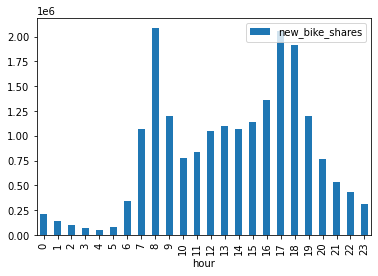

In [7]:

clean_df['timestamp'] = pd.to_datetime(clean_df['timestamp'])

# from the timestamp, figure the hour
clean_df['hour'] = clean_df['timestamp'].dt.hour
time_day = clean_df.groupby(['hour']).sum()

time_day.plot(kind='bar', y='new_bike_shares')

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR12 - Compare the distribution of bike shares by time of the week

<AxesSubplot:title={'center':'Bike Share by time of week'}, xlabel='hour'>

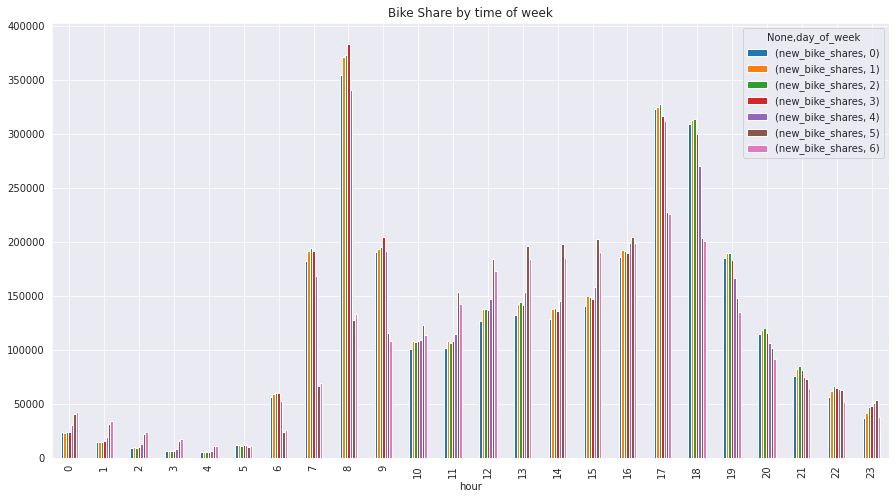

In [100]:
import matplotlib.pyplot as plt
clean_df['day_of_week'] = clean_df['timestamp'].dt.dayofweek
df_use = clean_df[['new_bike_shares', 'day_of_week', 'hour']]
# group by hour and day of week
b = df_use.groupby(['hour', 'day_of_week']).sum()

b.unstack().plot(kind='bar', figsize=(15, 8), title="Bike Share by time of week")


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR13 - Investigate the effects of “feels like” temperature on the number of bike shares

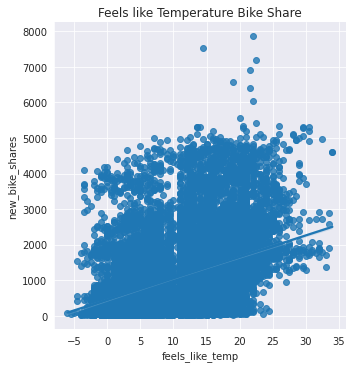

Text(0.5, 1.0, 'Feels like Temperature Bike Share')

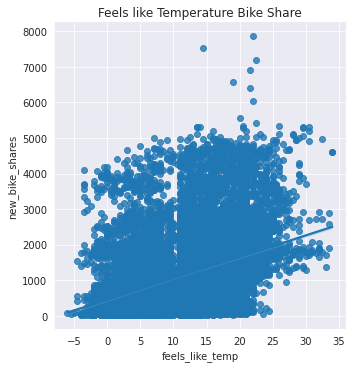

In [113]:
import seaborn as sns

sns.lmplot(x='feels_like_temp',y='new_bike_shares',data=clean_df)
plt.title('Feels like Temperature Bike Share')

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR14 - Test the hypothesis that “feels like” temperature has an effect on the number of bike shares

In [108]:
from scipy.stats import spearmanr

approved_level = 0.05
stats, p_val = spearmanr(clean_df.feels_like_temp, clean_df.new_bike_shares)
print('stats=%.3f, p=%.3f' % (stats, p_val))

if p_val <= approved_level:
  print("It is dependant")
else:
  print("Fail to Reject Hypothesis")

  
  

stats=0.384, p=0.000
It is dependant


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Process Development Report for Programming Task 2


Approaching task 2, It is common how we often deal with large datasets while working with CSV files during data analysis. Sometimes, it might be possible that a single CSV file doesn’t consist of all the data that you need. In such cases, there’s a need to merge these files into a single data frame. Luckily, the Pandas library provides us with various methods such as merge, concat and join to make this possible. It is amazing pandas library has these functions and all we need to do is import library and write codes of instruction. I imported pandas as pd, named my datasets df1, df2 respectively, called pandas to read my files, used the merge command to merge task2a.csv and task2b.csv., and showed the first 10 lines of my data head.
And when I did, I noticed the data needed some cleaning as some data were NaN. After I cleaned new bike shares and season code using conditional statement and drop command. I was able to Investigate the distribution of bike shares by time of the day of which pandas played a huge role by making the visualisation clear. For me to compare the distribution of bike shares by time of the week, I imported another library 'matplotlib.pyplot' which is basically used to plot graphs for visualisation, And grouped by hour and day of the week. To investigate the effects of “feels like” temperature on the number of bike shares I plot x='feels_like_temp',y='new_bike_shares to have my gragh visualisation. I imported another library for statistical plotting in Python. Seaborn is a library mostly used for statistical plotting in Python. It is built on top of Matplotlib and provides beautiful default styles and color palettes to make statistical plots more attractive. I tested the hypothesis that “feels like” temperature has an effect on the number of bike shares by doing the following; From scipy.stats I imported spearmanr set the approved level which 0.05 and tested.

REFERENCE
https://www.geeksforgeeks.org/python-seaborn-tutorial/
https://stackoverflow.com
https://www.youtube.com/watch?v=B8LcYdblXBI

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>